# Exploramos los datos

In [3]:
# Montamos nuestro google drive en el colab

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

DATA_HOME = Path("/content/gdrive/My Drive/ml-practico-data")

In [6]:
ratings = pd.read_csv(DATA_HOME / 'title.ratings.tsv.gz', sep='\t', compression='gzip')

In [11]:
episodes = pd.read_csv(DATA_HOME / 'title.episode.tsv.gz', sep='\t', compression='gzip')

In [13]:
title_basics = pd.read_csv(DATA_HOME / 'title.basics.tsv.gz', sep='\t', compression='gzip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
lost = 'tt0411008'
dbz = 'tt0214341'
friends = 'tt0108778'
hoc = 'tt1856010'
dr_who = 'tt0436992'

s = 'tt1475582'

mint = lambda x: None if x == '\\N' else int(x)

def get_series_ts(tconst):
    s_episodes = episodes[episodes.parentTconst == s].copy()
    s_episodes.seasonNumber = s_episodes.seasonNumber.apply(mint)
    s_episodes.episodeNumber = s_episodes.episodeNumber.apply(mint)
    s_episodes = s_episodes.merge(ratings, on='tconst').sort_values(['seasonNumber', 'episodeNumber'])
    s_episodes['idx'] = range(len(s_episodes))
    s_episodes = s_episodes.set_index('idx')
    return s_episodes

def name(tconst):  
    return title_basics[title_basics.tconst == s].iloc[0].primaryTitle


In [15]:
s_episodes = get_series_ts(s)

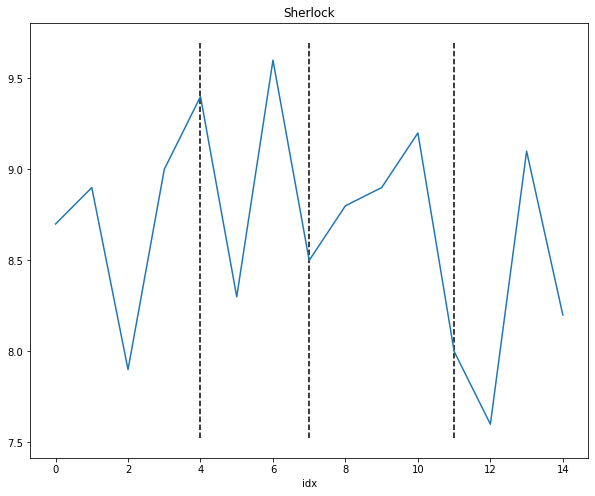

In [16]:
plt.figure(figsize=(10,8))
plt.title(name(s))
s_episodes.averageRating.plot()
m = s_episodes.averageRating.min()
M = s_episodes.averageRating.max()
plt.vlines(s_episodes.index[(s_episodes.seasonNumber.diff() == 1)], m*0.99, M*1.01, linestyles='--')

In [17]:
episodes.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5


In [18]:
principals = pd.read_csv(DATA_HOME / 'title.principals.tsv.gz', sep='\t', compression='gzip')

In [19]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [20]:
woodie = 'nm0000095'

director_movies = principals[(principals.nconst == woodie) & (principals.category == 'director')]

In [21]:
director_movies = director_movies.merge(ratings, on='tconst').merge(title_basics, on='tconst')

In [22]:
director_movies.startYear = director_movies.startYear.apply(int)

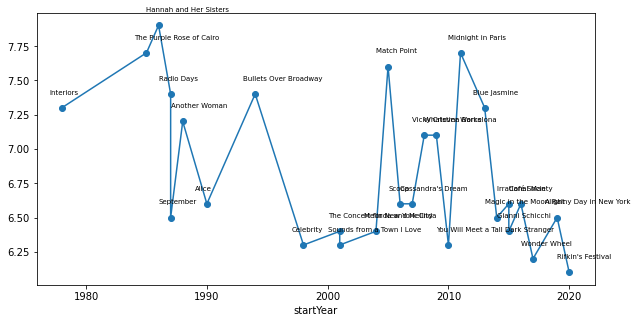

In [54]:
from random import Random

s = director_movies.set_index('startYear').sort_index().averageRating

plt.figure(figsize=(10,5))
s.plot(style='-o')

rnd = Random(42)
# Algunas se peliculas se pisan, pero para lo que queremos ahora no es 
# necesario mas
for d in director_movies.reset_index().to_dict(orient='records'):
  plt.text(
      d['startYear']-1, d['averageRating'] + 0.1, d['primaryTitle'], 
      fontdict={'size': 7}
  )


In [55]:
director_movies[['primaryTitle', 'averageRating', 'startYear']]

,primaryTitle,averageRating,startYear
0,Interiors,7.3,1978
1,The Purple Rose of Cairo,7.7,1985
2,Hannah and Her Sisters,7.9,1986
3,Radio Days,7.4,1987
4,September,6.5,1987
5,Another Woman,7.2,1988
6,Alice,6.6,1990
7,Bullets Over Broadway,7.4,1994
8,Celebrity,6.3,1998
9,The Concert for New York City,6.4,2001


Miramos el tipo de las columnas

Nos está diciendo que tenemos columnas con tipos mezclados (por ejemplo numero y string).

Eso hace que la columa se interprete como string (se muestra como object en pandas)

In [ ]:
title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

# A ver algunas rows

In [ ]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


## titleType

In [56]:
lost = title_basics[(title_basics.titleType == 'tvEpisode') & (title_basics.primaryTitle == 'Lost')]

In [57]:
title_basics[title_basics.tconst=='tt1286039']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2543820,tt1286039,tvSeries,Stargate Universe,SGU Stargate Universe,0,2009,2011,43,"Drama,Sci-Fi"


In [58]:
lost.merge(ratings, on='tconst').sort_values('tconst')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0503671,tvEpisode,Lost,Lost,0,2001,\N,45,"Comedy,Drama,Family",6.2,64
1,tt0525442,tvEpisode,Lost,Lost,0,1985,\N,\N,"Crime,Drama",8.3,56
2,tt0644764,tvEpisode,Lost,Lost,0,2005,\N,\N,"Crime,Documentary,Drama",8.0,112
3,tt0672574,tvEpisode,Lost,Lost,0,1999,\N,43,"Action,Drama",9.0,27
4,tt0703690,tvEpisode,Lost,Lost,0,1999,\N,\N,"Adventure,Family,Mystery",8.8,41
5,tt0797697,tvEpisode,Lost,Lost,0,2003,\N,\N,"Adventure,Comedy,Family",8.4,15
6,tt0916950,tvEpisode,Lost,Lost,0,2007,\N,\N,"Comedy,Drama,Romance",7.3,11
7,tt10699594,tvEpisode,Lost,Lost,0,2019,\N,\N,"Crime,Horror,Mystery",7.6,77
8,tt1074384,tvEpisode,Lost,Lost,0,1996,\N,\N,Comedy,7.3,7
9,tt1093143,tvEpisode,Lost,Lost,0,1999,\N,22,"Drama,Family,History",5.9,28


In [59]:
title_basics.titleType.value_counts()

tvEpisode       6763910
short            874438
movie            612816
video            261702
tvSeries         226595
tvMovie          136471
tvMiniSeries      43842
tvSpecial         37338
videoGame         31387
tvShort           10574
tvPilot               2
Name: titleType, dtype: int64

**Descartamos las series** (no aplican para lo que estamos trabajando ahora)

In [60]:
title_basics = title_basics[
    # Dejamos tvSpecial, video y tvMovie por ahora, vamos a ver de que se tratan
    ~title_basics.titleType.isin(['tvEpisode', 'tvSeries', 'tvMiniSeries', 'videoGame', 'tvShort', 'short'])
]

len(title_basics) # vemos con cuanta data nos quedamos

1048329

In [61]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama


## runtimeMinutes

In [62]:
# Convertimos runtimeMinutes a float. No se puede tener una columna de tipo int con NaN
title_basics.runtimeMinutes = (
    title_basics.runtimeMinutes.apply(lambda x: np.nan if x == r'\N' else x).astype(float)
)

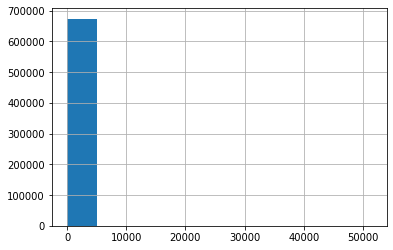

In [63]:
title_basics.runtimeMinutes.dropna().hist();

Intentamos hacer un histograma, pero no se ve nada. Parece tener algunos valores muy grandes

In [64]:
title_basics.sort_values('runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8241841,tt8273150,movie,Logistics,Logistics,0,2012,\N,51420.0,Documentary
6259303,tt3854496,movie,Ambiancé,Ambiancé,0,2020,\N,43200.0,Documentary
2135921,tt12095652,video,The Longest Video on YouTube: 596.5 Hours,The Longest Video on YouTube: 596.5 Hours,0,2011,\N,35791.0,\N
2234476,tt12277054,movie,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),0,2019,\N,28643.0,Documentary
5749548,tt2659636,movie,Modern Times Forever,Modern Times Forever,0,2011,\N,14400.0,Documentary


Efectivamente hay valores enormes. runtimeMinutes = 13319 quiere decir 221 horas!!!!

**Cuantas peliculas de mas de 3 horas hay?**

In [65]:
(title_basics.runtimeMinutes > 3 * 60).sum() / len(title_basics)

0.010104652260883749

In [66]:
# Un 0.9%, a ver algunas...

title_basics[title_basics.runtimeMinutes > 3 * 60].sample(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8564770,tt8979864,video,Monster Cock My Mom,Monster Cock My Mom,1,2010,\N,241.0,Adult
366079,tt0381851,tvSpecial,The 76th Annual Academy Awards,The 76th Annual Academy Awards,0,2004,\N,225.0,Music
7264657,tt6121444,movie,"Mektoub, My Love: Canto Uno","Mektoub, My Love: Canto Uno",0,2017,\N,181.0,"Comedy,Romance"
8875683,tt9651884,video,My Black Lover,My Black Lover,1,2013,\N,246.0,Adult
4507842,tt16744974,tvSpecial,Vaalit '96,Vaalit '96,0,1996,\N,216.0,\N
5921460,tt3071020,video,Big Butt Attack 7,Big Butt Attack 7,1,2009,\N,206.0,Adult
174024,tt0180375,tvMovie,Nessuno escluso,Nessuno escluso,0,1997,\N,200.0,Drama
6728391,tt4910758,video,Chô do hakuryoku serebu: Appaku kyûin-goroshi!,Chô do hakuryoku serebu: Appaku kyûin-goroshi!,1,2007,\N,185.0,Adult
3276091,tt14199752,video,Hot Cherry Pies 7,Hot Cherry Pies 7,1,2013,\N,261.0,Adult
930714,tt0961119,video,Philosophy of a Knife,Philosophy of a Knife,0,2008,\N,266.0,"Drama,Horror"


**Parece haber muchos video**

In [67]:
title_basics[title_basics.runtimeMinutes > 3 * 60].titleType.value_counts()

video        6181
movie        2275
tvMovie      1186
tvSpecial     951
Name: titleType, dtype: int64

**Pareciera que hay muchos videos, tvMovie y tvSpecial**

Por otro lado, alguna de estas estará en la base de datos de grossing? Ya que estamos, tambien podemos juntarla con la de ratings

### Merges para ver una foto mas completa

In [68]:
movie_gross = pd.read_csv(DATA_HOME / 'movie_gross.csv')

In [69]:
movie_gross.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [70]:
movie_gross.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [71]:
# No tenemos el id, pero tenemos el link
movie_gross.movie_imdb_link.head()

0    http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1    http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2    http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3    http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4    http://www.imdb.com/title/tt5289954/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

In [72]:
movie_gross['tconst'] = movie_gross.movie_imdb_link.apply(lambda x: x.split('/')[4])

In [73]:
# A priori solo nos interesa el tconst y el gross

movie_gross = movie_gross[['tconst', 'gross']]

In [74]:
movies = title_basics.merge(movie_gross, on='tconst')

In [75]:
# Checkeamos no perder datos
len(movies), len(movie_gross), len(title_basics)

(4924, 5043, 1048329)

In [76]:
# Perdemos un monton!!!!

movies = title_basics.merge(movie_gross, on='tconst', how='left')

In [77]:
len(movies), len(movie_gross), len(title_basics)

(1048451, 5043, 1048329)

In [78]:
# Pareciera haber repetidos en movie_gross....

repeated = movie_gross.tconst.value_counts().sort_values(ascending=False).head(10)
repeated

tt0232500    3
tt3332064    3
tt0360717    3
tt2224026    3
tt1976009    3
tt0077651    3
tt2638144    3
tt4651520    2
tt1051904    2
tt1343727    2
Name: tconst, dtype: int64

In [79]:
movie_gross[movie_gross.tconst.isin(repeated.index.tolist())].sort_values('tconst').head(20)

,tconst,gross
4821,tt0077651,47000000.0
2619,tt0077651,47000000.0
2492,tt0077651,47000000.0
100,tt0232500,144512310.0
1332,tt0232500,144512310.0
395,tt0232500,144512310.0
4694,tt0360717,218051260.0
25,tt0360717,218051260.0
2049,tt0360717,218051260.0
4569,tt1051904,80021740.0


In [80]:
# Pareciera que los repetidos son repetidos de verdad. Vamos a hacer un ultimo check

# Vemos la cantidad de valores distintos para "gross", para ver si hay valores diferentes
movie_gross.groupby('tconst').agg({'gross':'nunique'}).max()

gross    1
dtype: int64

In [83]:
# Vamos de deduplicar gross

movie_gross = movie_gross.drop_duplicates(['tconst'])

In [84]:
movies = title_basics.merge(movie_gross, on='tconst', how='left')

len(movies), len(title_basics), len(movie_gross)

(1048329, 1048329, 4919)

### Merge con ratings

In [85]:
title_ratings = pd.read_csv(DATA_HOME / 'title.ratings.tsv.gz', sep='\t', compression='gzip')

In [86]:
movies_wr = movies.merge(title_ratings, on='tconst')
movies_wr.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,gross,averageRating,numVotes
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100.0,\N,NaN,4.5,14
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70.0,"Action,Adventure,Biography",NaN,6.0,772
2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90.0,Drama,NaN,4.5,18
3,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,NaN,Drama,NaN,4.5,23
4,tt0000630,movie,Hamlet,Amleto,0,1908,\N,NaN,Drama,NaN,3.9,25


In [87]:
# Checkeamos que no perdimos data en el join
len(movies_wr), len(movies), len(title_ratings)

(389386, 1048329, 1254186)

In [88]:
# Perdimos un monton de datos!!!!!!
# Ademas podemos ver que hay peliculas que tienen rating pero que no figuran en title_basics
# por ahora no hacemos nada con eso...

movies_wr = movies.merge(title_ratings, on='tconst', how='left')

In [89]:
len(movies_wr), len(movies), len(title_ratings)

(1048329, 1048329, 1254186)

In [90]:
movies = movies_wr

## Volviendo a donde estabamos con los titleType

In [91]:
movies[movies.runtimeMinutes > 3 * 60].sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,gross,averageRating,numVotes
919276,tt6374408,video,The Sexual Desires of Casey Calvert,The Sexual Desires of Casey Calvert,1,2016,\N,190.0,Adult,NaN,NaN,NaN
77070,tt0101428,movie,The Beautiful Troublemaker,La Belle Noiseuse,0,1991,\N,238.0,Drama,NaN,7.5,8226.0
743656,tt2780166,movie,"Paranormal Occult: Magick, Angels and Demons","Paranormal Occult: Magick, Angels and Demons",0,2013,\N,250.0,Documentary,NaN,4.4,11.0
581346,tt15543616,video,Step Up and Dance - Level 2,Step Up and Dance - Level 2,0,2008,\N,240.0,\N,NaN,NaN,NaN
1036339,tt9526654,video,Musbilen,Musbilen,1,2005,\N,201.0,Adult,NaN,NaN,NaN
115751,tt0158273,tvMovie,Titanic: Death of a Dream,Titanic: The Legend Lives On,0,1994,\N,200.0,"Documentary,History",NaN,8.7,205.0
432219,tt12235042,tvMovie,Der Soldatenmord von Lebach,Der Soldatenmord von Lebach,0,1972,\N,185.0,"Documentary,Drama,History",NaN,NaN,NaN
703902,tt2198227,movie,The Drones: A Thousand Mistakes,The Drones: A Thousand Mistakes,0,2011,\N,270.0,Music,NaN,NaN,NaN
493379,tt1363097,video,ECW Blood Sport: The Most Violent Matches,ECW Blood Sport: The Most Violent Matches,0,2006,\N,315.0,Sport,NaN,8.4,68.0
1045997,tt9844238,video,Lesbian House Hunters 17,Lesbian House Hunters 17,1,2018,\N,183.0,"Adult,Drama,Romance",NaN,NaN,NaN


**Parece haber mucho de adultos**

In [92]:
n_long_adult = movies[movies.runtimeMinutes > 3 * 60].genres.apply(lambda x: 'Adult' in x).sum()
n_long = (movies.runtimeMinutes > 3 * 60).sum()

n_long, n_long_adult, n_long_adult / n_long

(10593, 4753, 0.44869253280468235)

**Parece que no tienen data de gross**

In [93]:
movies[movies.runtimeMinutes > 3 * 60].gross.isna().sum() / n_long

0.9967903332389314

In [94]:
# idem para 2 horas
movies[movies.runtimeMinutes > 2 * 60].gross.isna().sum() / (movies.runtimeMinutes > 2 * 60).sum()

0.9866623388120039

In [95]:
movies = movies[movies.runtimeMinutes <= 2 * 60].copy()

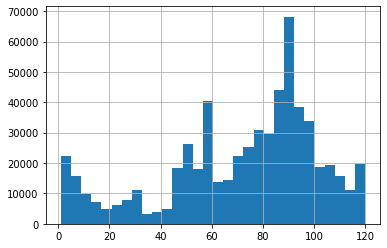

In [96]:
movies.runtimeMinutes.hist(bins=30);

Sigue habiendo duraciones muy cortas!!! 

Veamos a ver si alguna otra columna nos da una pista

## Genres

In [97]:
from itertools import chain
from collections import Counter

def parse_genres(genres):
    if isinstance(genres, float) or genres == r'\N': return ['no-genre']
    else: return genres.split(',')
    

movies['genres'] = movies.genres.apply(parse_genres)

In [98]:
Counter(chain(*movies.genres.tolist()))

Counter({'Action': 33734,
         'Adult': 50291,
         'Adventure': 24738,
         'Animation': 14378,
         'Biography': 18577,
         'Comedy': 109461,
         'Crime': 30928,
         'Documentary': 151270,
         'Drama': 171681,
         'Family': 21473,
         'Fantasy': 14188,
         'Film-Noir': 766,
         'Game-Show': 412,
         'History': 14909,
         'Horror': 28033,
         'Music': 31919,
         'Musical': 9267,
         'Mystery': 14689,
         'News': 4872,
         'Reality-TV': 2193,
         'Romance': 38081,
         'Sci-Fi': 10602,
         'Short': 69451,
         'Sport': 9238,
         'Talk-Show': 2295,
         'Thriller': 28521,
         'War': 7600,
         'Western': 6565,
         'no-genre': 31153})

**Hay varios Short, no debería!**

A ver cual es la duracion...

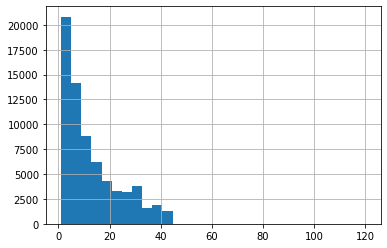

In [99]:
movies[movies.genres.apply(lambda x: 'Short' in x)].runtimeMinutes.hist(bins=30);

🚀

In [100]:
movies = movies[movies.genres.apply(lambda x: 'Short' not in x)]

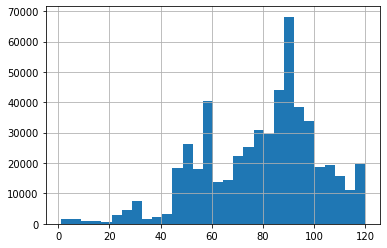

In [101]:
movies.runtimeMinutes.hist(bins=30);

In [102]:
movies[movies.runtimeMinutes < 60].titleType.value_counts()

movie        44638
tvMovie      37484
video        17656
tvSpecial     4685
Name: titleType, dtype: int64

Chau video, tvSpecial y tvMovie

In [103]:
movies = movies[~movies.titleType.isin(['video', 'tvSpecial', 'tvMovie'])]

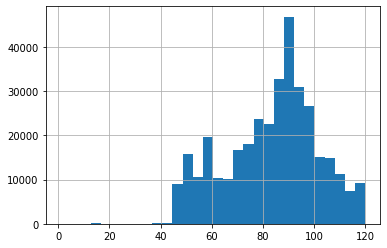

In [104]:
movies.runtimeMinutes.hist(bins=30);

## [Cuanto dura un largometraje??](https://www.google.com/search?q=cuanto+dura+un+largometraje&oq=cuanto+dura+un+largometraje&aqs=chrome..69i57.3779j0j7&sourceid=chrome&ie=UTF-8)

In [105]:
movies = movies[movies.runtimeMinutes >= 60]

Se te ocurre algun otro check para hacer??